In [1]:
"""import relevant packages"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qutip import *

In [2]:
"""redefine relevant Hamiltonian parameters"""
omega = 2*pi*6e3   # transmon resonance frequency in MHz (sets time to be in microseconds)
alpha = 2*pi*3e2   # transmon anharmonicity in MHz

In [4]:
"""define the linear algebra"""
N = 3              # maximum occupancy size; treats transmon as three level system
g = basis(N,0)     # basis(N,m) = fock state ket vector, N = levels in Hilbert space, m = excited level
e = basis(N,1)
f = basis(N,2)

In [8]:
"""define transmon Hamiltonian, reduced Plack's constant = 1"""
A = destroy(N)                                         # detroy() destroys one excitation spanned by space of N
                                                       # X.dag() creates one excitation for X
Ht = omega*A.dag()*A-.5*alpha*A.dag()*A.dag()*A*A      # transmon Hamiltonian  
Hho = omega*A.dag()*A                                  # harmonic oscillator Hamiltonian

In [14]:
"""make unitary transformation into frame of the Transmon with reduced Planck's constant = 1"""
Ht_rf = -0.5*alpha*A.dag()**2*A**2                     # _rf represents nondissipative Hamiltonian
Hho_rf = 0*Hho

In [16]:
tlist = np.linspace(0,10,10000)                        # array of 10,000 numbers evenly spaced between 0 and 10
c_ops = []                                             # collapse operators
e_ops = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e),(g-e)]    # expectation values

In [17]:
result = mesolve(Ht_rf,(g+e).unit(),tlist,c_ops,e_ops) # mesolve calculates the unitary (nondissipative) time-evolution of an arbitrary state vector |psi0⟩ based on Hamiltonian
                                                       # psi0 = (g+e).unit()

In [29]:
H_dt = -0.5*alpha*A.dag()**2*A**2                      
H1 = (A+A.dag())
def H1_coeff(t,args):
    return args['A']*np.exp(-((t-0.5)/args['s'])**2)
H = [H_dt,[H1,H1_coeff]]

Text(0.5, 1.0, 'Qubit Drive')

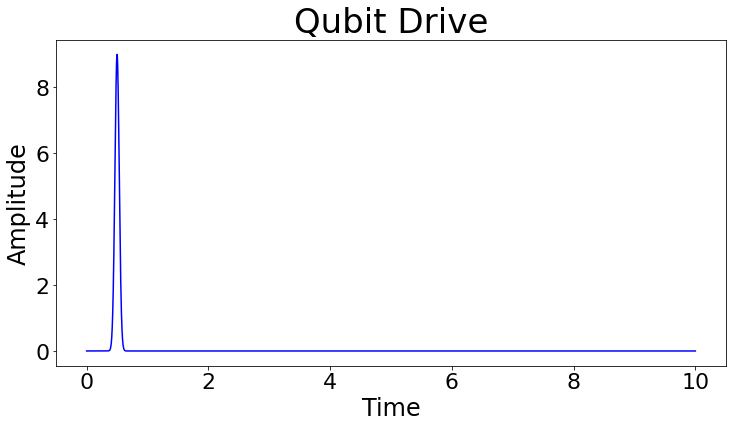

In [19]:
"""plotting qubit drive (amplitude vs. time)"""
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
ax.plot(tlist, H1_coeff(tlist,args={'A': 9,'s':0.05}), 'b')
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Amplitude',fontsize=24)
plt.title("Qubit Drive",fontsize=34)

In [20]:
options = Options(atol=1e-12, rtol=1e-12,max_step=1e-4)  # Options() changes the built-in parameters of the dynamics solvers used by mesolve()
t_g = np.zeros(len(result.states))
t_e = np.zeros(len(result.states))
t_f = np.zeros(len(result.states))
t_gpe = np.zeros(len(result.states))
c_0 = np.zeros(len(result.states))
amps = np.arange(-350,352.0,2.0)     # arange() returns numbers from -350 to 352.0, evenly spaced by 2.0. amp = amplitudes
x = np.zeros(len(amps))
for k in range(0,len(amps)):
    print(amps[k])                   # helps see progress of code (this cell takes a while to fully load)
    result_redriveQ = mesolve(H,g,tlist,c_ops,args={'A': amps[k],'s':0.16/6.0},options=options) 
    x[k] = expect(e*e.dag(),result_redriveQ.states[500])   # x = array of expectation values, e*e.dag() is the operator, results from result_redriveQ are the states

Text(0.5, 1.0, 'Power Rabi')

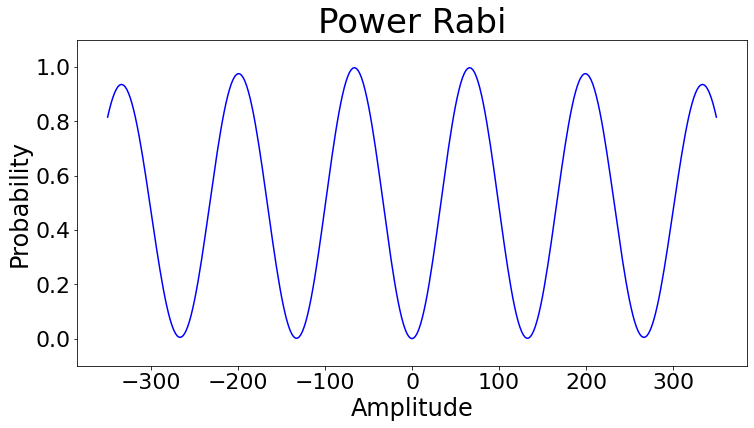

In [21]:
"""plotting power rabi oscillations (probability vs. amplitude)"""
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
ax.plot(amps, x, 'b')                # expectation values (probability) vs. amplitudes
ax.set_xlabel('Amplitude',fontsize=24)
ax.set_ylabel('Probability',fontsize=24)
plt.ylim([-.1,1.1])
plt.title("Power Rabi",fontsize=34)

In [22]:
"""define photon dissipation"""
c_ops_dis1 = []
kappa_dis1 = np.power(1.0e1,-1) # microseconds
c_ops_dis1.append(np.sqrt(kappa_dis1)*A)

In [24]:
%%time
tlist_dis = np.linspace(0,50,1000)
options = Options(atol=1e-12,rtol=1e-12,max_step=1e-4)
result_redrive_test = mesolve(H,g,tlist_dis,c_ops_dis1,args={'A':18.0,'s':0.05},options=options)
t_e = np.zeros(len(result_redrive_test.states))
for index in range(len(result_redrive_test.states)):
    t_e[index] = expect(e*e.dag(),result_redrive_test.states[index])

Wall time: 4.27 s


Text(0.5, 1.0, 'T1 Decay with Pulse')

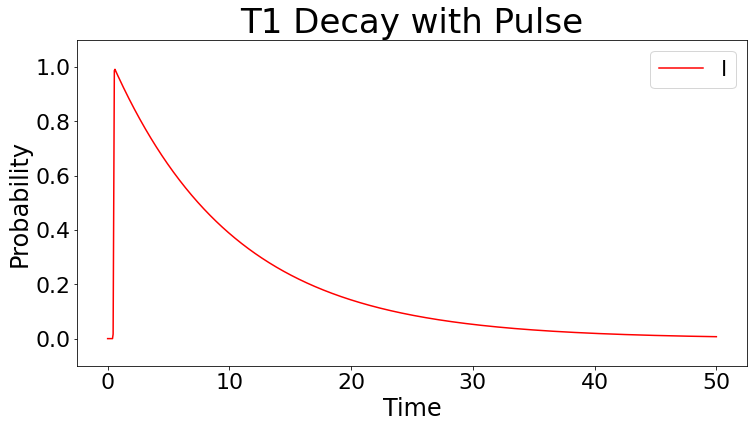

In [27]:
"""plotting T1 decay with pulse"""
fig,ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
ax.plot(tlist_dis,t_e,'r')
ax.legend(('l'))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24)
plt.ylim([-0.1,1.1])
plt.title('T1 Decay with Pulse',fontsize=34)